In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
kyphosis_df = pd.read_csv('kyphosis.csv')

In [4]:
kyphosis_df

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15
...,...,...,...,...
76,present,157,3,13
77,absent,26,7,13
78,absent,120,2,13
79,present,42,7,6


In [5]:
kyphosis_df.head(5)

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [6]:
kyphosis_df.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


In [7]:
kyphosis_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


Visulization of data

<AxesSubplot:xlabel='Kyphosis', ylabel='count'>

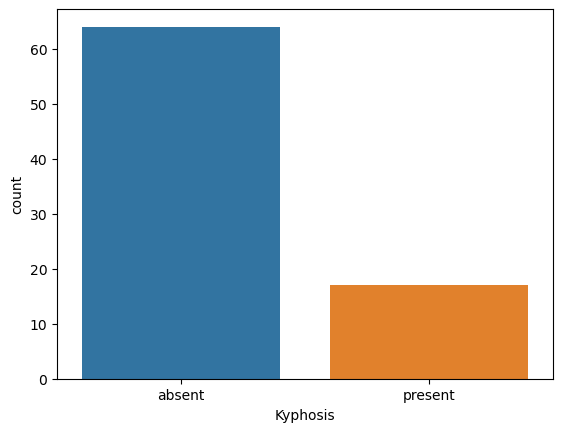

In [12]:
sns.countplot(x ='Kyphosis', data= kyphosis_df, label  = 'Count')

In [14]:
#encoding Kyphosis column into 0 and 1
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
LabelEncoder_y = LabelEncoder()
kyphosis_df['Kyphosis'] = LabelEncoder_y.fit_transform(kyphosis_df['Kyphosis'])

In [15]:
kyphosis_df

,Kyphosis,Age,Number,Start
0,0,71,3,5
1,0,158,3,14
2,1,128,4,5
3,0,2,5,1
4,0,1,4,15
...,...,...,...,...
76,1,157,3,13
77,0,26,7,13
78,0,120,2,13
79,1,42,7,6


In [21]:
kyphosis_false = kyphosis_df[kyphosis_df['Kyphosis'] == 0]

In [22]:
kyphosis_false

,Kyphosis,Age,Number,Start
0,0,71,3,5
1,0,158,3,14
3,0,2,5,1
4,0,1,4,15
5,0,1,2,16
...,...,...,...,...
74,0,11,3,15
75,0,178,4,15
77,0,26,7,13
78,0,120,2,13


In [23]:
kyphosis_true = kyphosis_df[kyphosis_df['Kyphosis'] == 1]

In [24]:
kyphosis_true

,Kyphosis,Age,Number,Start
2,1,128,4,5
9,1,59,6,12
10,1,82,5,14
21,1,105,6,5
22,1,96,3,12
24,1,15,7,2
37,1,52,5,6
39,1,91,5,12
40,1,73,5,1
45,1,139,3,10


In [27]:
print('% of Disease present after the operation = ', (len(kyphosis_true)/len(kyphosis_df))*100,'%')

% of Disease present after the operation =  20.98765432098765 %


In [31]:
print('% of Disease absent after the operation i.e operation successful= ', (len(kyphosis_false)/len(kyphosis_df))*100,'%')

% of Disease absent after the operation i.e operation successful=  79.01234567901234 %


<AxesSubplot:>

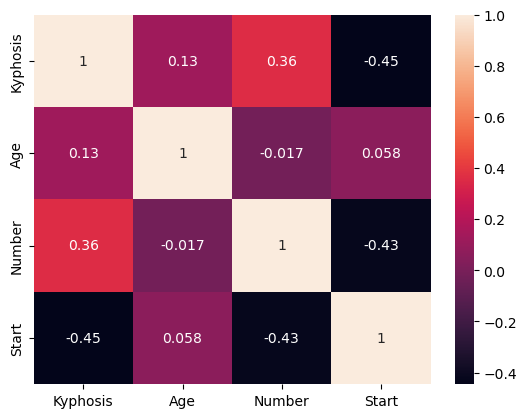

In [32]:
sns.heatmap(kyphosis_df.corr(), annot = True)

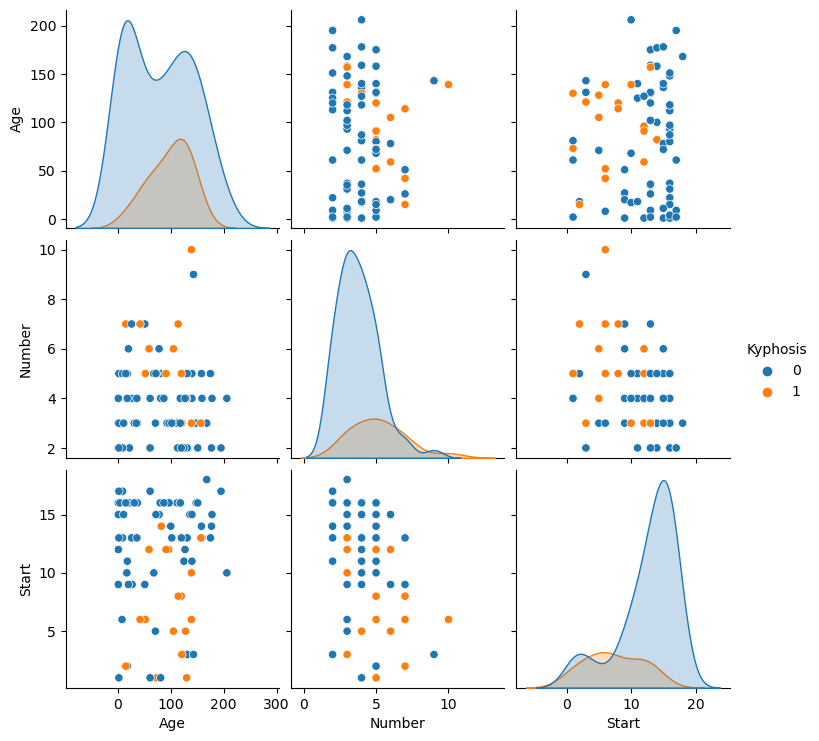

In [33]:
sns.pairplot(kyphosis_df, hue = 'Kyphosis', vars = ['Age','Number','Start'])

Create testing and training dataset---data cleaning

In [34]:
kyphosis_df

,Kyphosis,Age,Number,Start
0,0,71,3,5
1,0,158,3,14
2,1,128,4,5
3,0,2,5,1
4,0,1,4,15
...,...,...,...,...
76,1,157,3,13
77,0,26,7,13
78,0,120,2,13
79,1,42,7,6


In [35]:
X = kyphosis_df.drop(['Kyphosis'], axis = 1)

In [36]:
X

,Age,Number,Start
0,71,3,5
1,158,3,14
2,128,4,5
3,2,5,1
4,1,4,15
...,...,...,...
76,157,3,13
77,26,7,13
78,120,2,13
79,42,7,6


In [37]:
y = kyphosis_df['Kyphosis']

In [38]:
y

0     0
1     0
2     1
3     0
4     0
     ..
76    1
77    0
78    0
79    1
80    0
Name: Kyphosis, Length: 81, dtype: int32

Divide data into training and testing set

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3)

Train the model

In [41]:
X_train.shape

(56, 3)

In [42]:
X_test.shape

(25, 3)

In [43]:
y_train.shape

(56,)

In [44]:
y_test.shape

(25,)

In [48]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train,y_train)

DecisionTreeClassifier()

Feature importances--check which column is more important while training the dataset

In [51]:
feature_importance = pd.DataFrame(decision_tree.feature_importances_,index = X_train.columns, columns = ['importance']).sort_values('importance', ascending=False)

In [53]:
feature_importance #which one is more important feature out of all where start column is most importance

,importance
Start,0.436700
Age,0.394027
Number,0.169272


 Evaluating the model

In [54]:
from sklearn.metrics import classification_report, confusion_matrix

In [56]:
y_predict_train = decision_tree.predict(X_train)

In [57]:
y_predict_train #what the model is predecting

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1])

In [61]:
y_train.array #ground truth which is the true value of the output

<PandasArray>
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
 0, 0, 0, 1]
Length: 56, dtype: int32

In [58]:
cm = confusion_matrix(y_train, y_predict_train)

<AxesSubplot:>

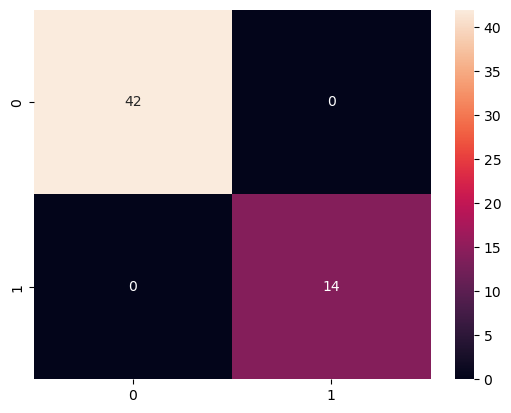

In [62]:
sns.heatmap(cm, annot = True)

In [63]:
y_predict_test = decision_tree.predict(X_test)

<AxesSubplot:>

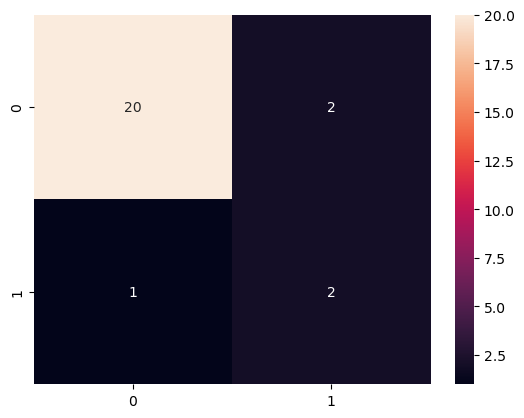

In [64]:
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot = True)

In [65]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93        22
           1       0.50      0.67      0.57         3

    accuracy                           0.88        25
   macro avg       0.73      0.79      0.75        25
weighted avg       0.90      0.88      0.89        25



Improving the model

In [66]:
from sklearn.ensemble import RandomForestClassifier
RandomForest = RandomForestClassifier(n_estimators = 150)
RandomForest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=150)

In [67]:
y_predict_train = RandomForest.predict(X_train)

In [68]:
cm = confusion_matrix(y_train, y_predict_train)

<AxesSubplot:>

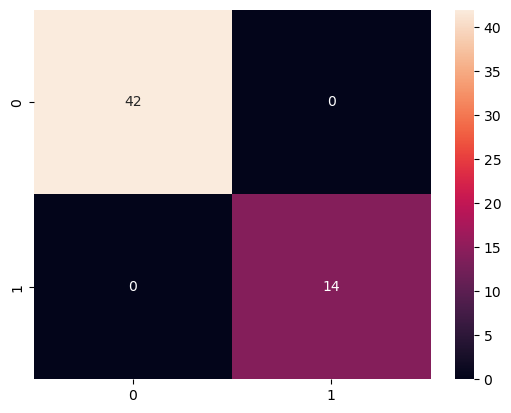

In [70]:
sns.heatmap(cm, annot=True)

In [71]:
y_predict_test = RandomForest.predict(X_test)

In [72]:
cm = confusion_matrix(y_test, y_predict_test)

<AxesSubplot:>

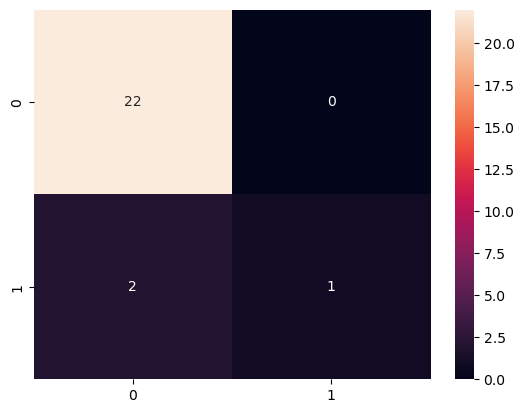

In [73]:
sns.heatmap(cm, annot=True)

In [75]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        22
           1       1.00      0.33      0.50         3

    accuracy                           0.92        25
   macro avg       0.96      0.67      0.73        25
weighted avg       0.93      0.92      0.90        25

